<a href="https://colab.research.google.com/github/Gis-sel/ML/blob/main/CZapata_GReyes_MFVillalobos_M6S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================
# @title Clustering jerárquico + PCA y T-SNE
# ==========================

In [ ]:

# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns




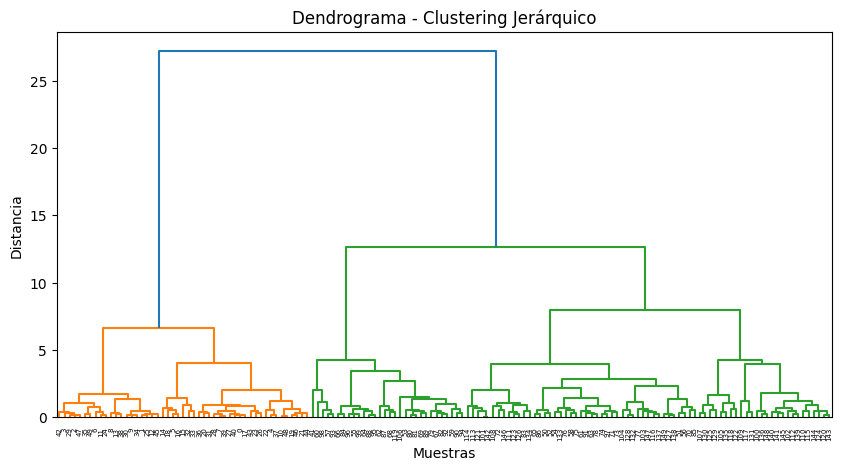

Etiquetas con 2 clústeres: [1 2]
Etiquetas con 3 clústeres: [1 2 3]


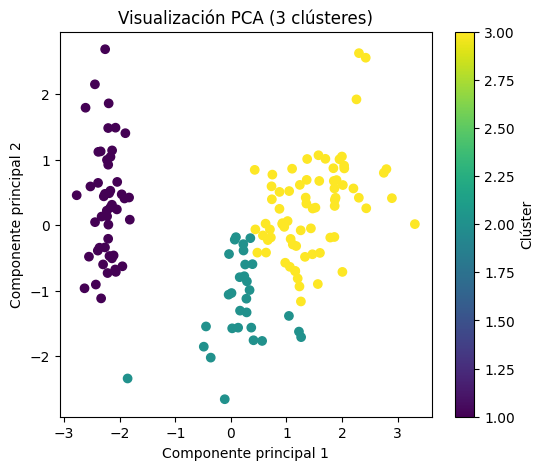

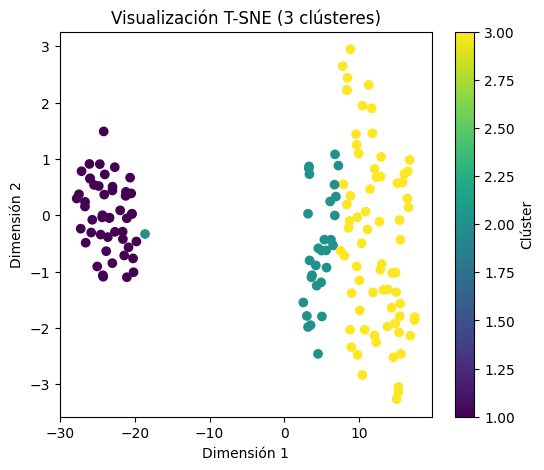


Interpretación:
- Los clústeres jerárquicos reflejan una estructura similar a las clases reales del dataset Iris.
- PCA muestra separación parcial entre grupos, útil para entender varianza global.
- T-SNE ofrece mejor separación no lineal, revelando estructuras ocultas más claras.


In [ ]:
# ==========================
# Cargar y escalar dataset
# ==========================
# Usaremos el dataset Iris (sin etiquetas para clustering)
iris = load_iris()
X = iris.data

# Escalar datos para que todas las variables tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================
# Clustering jerárquico
# ==========================
# Método 'ward' (minimiza varianza intra-clúster)
Z = linkage(X_scaled, method='ward')

# Dendrograma para visualizar jerarquías
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()

# Generar agrupamientos (2 y 3 clústeres)
clusters_2 = fcluster(Z, 2, criterion='maxclust')
clusters_3 = fcluster(Z, 3, criterion='maxclust')

print("Etiquetas con 2 clústeres:", np.unique(clusters_2))
print("Etiquetas con 3 clústeres:", np.unique(clusters_3))

# ==========================
# Visualización con PCA
# ==========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar PCA con 3 clústeres
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_3, cmap='viridis')
plt.title("Visualización PCA (3 clústeres)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label="Clúster")
plt.show()

# ==========================
# Visualización con T-SNE
# ==========================
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000) # Changed n_iter to max_iter
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_3, cmap='viridis')
plt.title("Visualización T-SNE (3 clústeres)")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.colorbar(label="Clúster")
plt.show()

# ==========================
# Interpretación
# ==========================
print("\nInterpretación:")
print("- Los clústeres jerárquicos reflejan una estructura similar a las clases reales del dataset Iris.")
print("- PCA muestra separación parcial entre grupos, útil para entender varianza global.")
print("- T-SNE ofrece mejor separación no lineal, revelando estructuras ocultas más claras.")

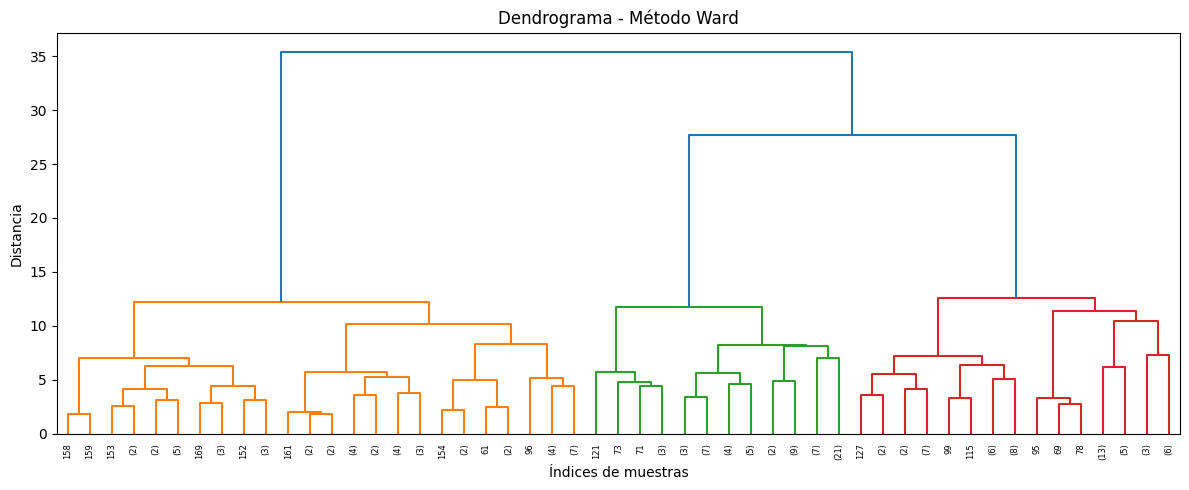

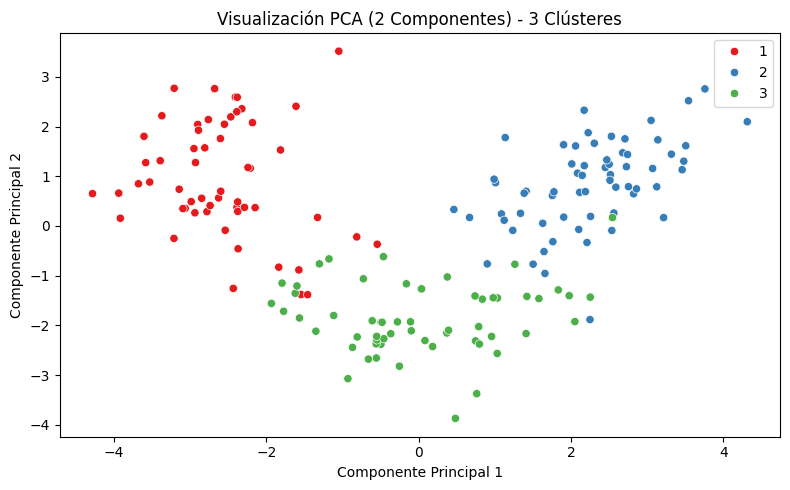

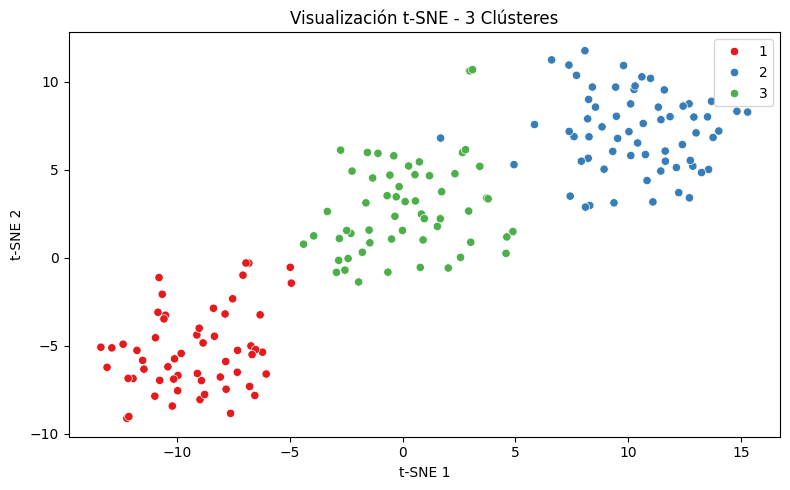

In [ ]:
# =========================================
# CLUSTERING JERÁRQUICO CON PCA Y T-SNE
# =========================================

# ---------------------------
# Cargar y escalar dataset
# ---------------------------
# Usamos dataset de vinos
data = load_wine()
X = data.data

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# Clustering jerárquico
# ---------------------------
# Método Ward
Z_ward = linkage(X_scaled, method='ward')

# Crear agrupamientos con 2 y 3 clústeres
clusters_2 = fcluster(Z_ward, 2, criterion='maxclust')
clusters_3 = fcluster(Z_ward, 3, criterion='maxclust')

# Visualizar dendrograma
plt.figure(figsize=(12, 5))
dendrogram(Z_ward, truncate_mode='level', p=5)
plt.title("Dendrograma - Método Ward")
plt.xlabel("Índices de muestras")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# ---------------------------
# Visualización con PCA
# ---------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_3, palette='Set1')
plt.title("Visualización PCA (2 Componentes) - 3 Clústeres")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()

# ---------------------------
# Visualización con t-SNE
# ---------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters_3, palette='Set1')
plt.title("Visualización t-SNE - 3 Clústeres")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()

